<a href="https://colab.research.google.com/github/fatenmegahed/npro/blob/main/student_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1=pd.read_csv(r'/content/student_mat.csv')
df2=pd.read_csv(r'/content/student_por.csv')
df=pd.concat([df1,df2])

In [8]:
df.head()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [13]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [14]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
  df[col]=le.fit_transform(df[col])

In [17]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [18]:
from sklearn.model_selection import train_test_split
x=df.drop('G3',axis=1)
y=df['G3']

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
#predicition=lr.predict(x_test)
#print(predicition)
acc_lr=lr.score(x_test,y_test)
acc_lr

0.7961687973654601

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
acc_rf=rf.score(x_test,y_test)
acc_rf

0.8003196079306744

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
acc_dt=dt.score(x_test,y_test)
#print(acc_dt)
acc_dt

0.6688650524769599

In [72]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
acc_sv=sv.score(x_test,y_test)
acc_sv

0.7029816460267637

Text(0, 0.5, 'Accuracy')

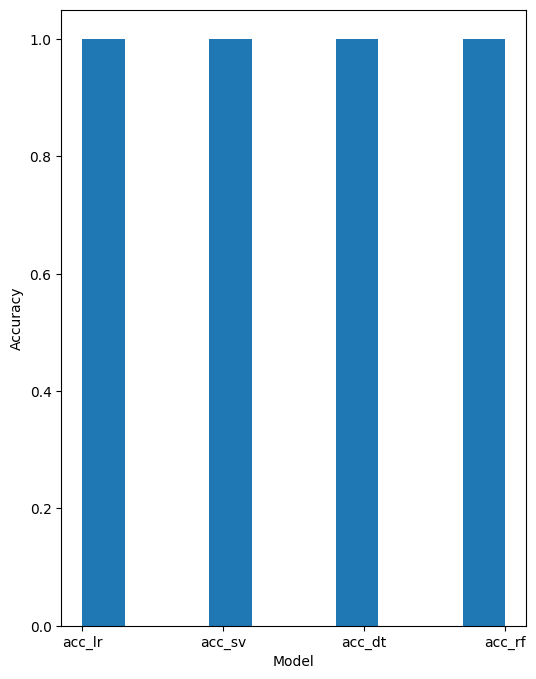

In [75]:
plt.figure(figsize=(6,8))
plt.hist([('acc_lr'),('acc_sv'),('acc_dt'),('acc_rf')])
plt.xlabel('Model')
plt.ylabel('Accuracy')
#plt.xticks(rotation=90)

/tmp/ipython-input-1861643992.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


([0, 1, 2, 3],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Support Vector Machine')])

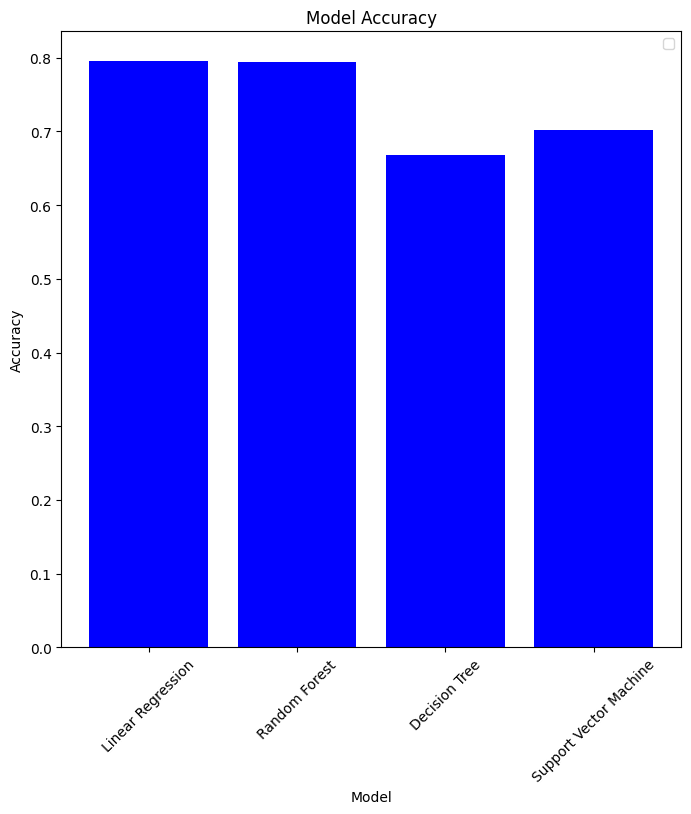

In [84]:

Model=['Linear Regression','Random Forest','Decision Tree','Support Vector Machine']
Accuracy=[0.796,0.794,0.668,0.7020]
plt.figure(figsize=(8,8), )
plt.bar(Model,Accuracy,color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.xticks(rotation=45)


<function matplotlib.pyplot.show(close=None, block=None)>

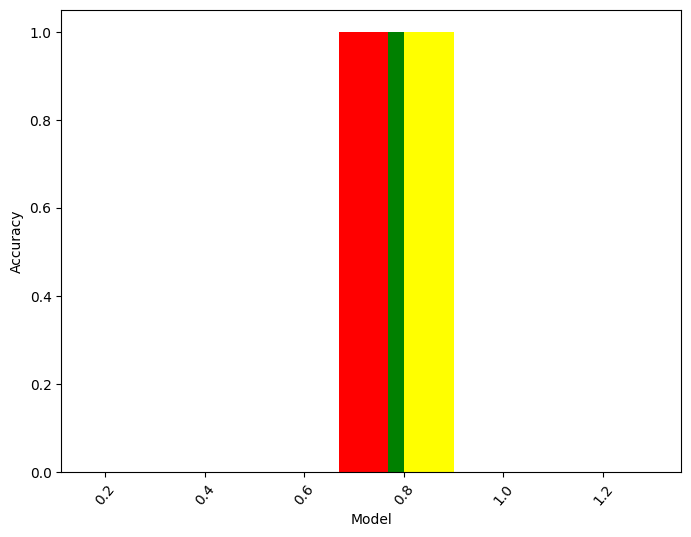

In [80]:
plt.figure(figsize=(8,6))
plt.hist(acc_lr, color='blue', label='Linear Regression')
plt.hist(acc_sv, color='green', label='Support Vector Machine')
plt.hist(acc_dt, color='red', label='Decision Tree')
plt.hist(acc_rf, color='yellow', label='Random Forest')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=50)
plt.show